## Setup

In [1]:
source("/research/lab_reiberger/2022_PSVD_metabolomics/2022_PSVD_metabolomics/R/00_setup.R")

In [2]:
p_load("dplyr", "ggplot2", "mice", "janitor", "POMA", "SummarizedExperiment", "EnhancedVolcano", install = FALSE)

In [3]:
metabol <- read.csv("outputs/01_metabolomics_merged.csv")
metabol <- metabol[2:ncol(metabol)]
metadata <- read.csv("outputs/01_metadata.csv")
metadata <- metadata[2:ncol(metadata)]

In [4]:
metadata <- metadata %>% filter(sample_id %in% metabol$sample_id)

In [5]:
metabolomics_obj <- PomaSummarizedExperiment(target = metadata, features = metabol[2:ncol(metabol)])

## Dimensionality reduction

In [6]:
p_plsda <- PomaMultivariate(metabolomics_obj, method = "plsda")

p_plsda <- p_plsda$scoresplot +
  ggplot2::ggtitle("PLS-DA")

validation argument is empty! Mfold will be used




comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%
comp 4 
  |======================================================================| 100%
comp 5 
  |======================================================================| 100%


Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


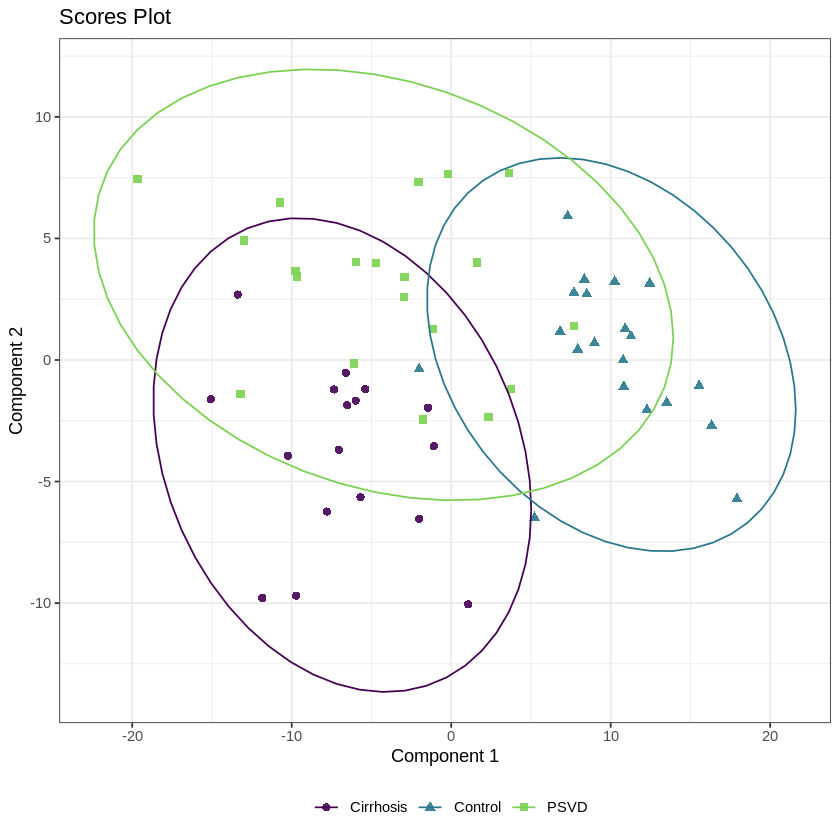

In [31]:
plsda

In [34]:
p_heatmap <- PomaCorr(metabolomics_obj, label_size = 8, coeff = 0.6)
p_heatmap$correlations

Loading required namespace: ggraph



feature1,feature2,corr,pvalue,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
pc_33_2,pe_36_2,0.9929365,1.308577e-52,5.908227e-48
pc_35_2,pe_38_2,0.9856383,3.558488e-44,8.033286e-40
alpha_ketoglutaric_acid,dimethyl_succinic_acid,0.9840204,6.562851e-43,9.877091e-39
tag_54_5,tag_54_6,0.9802608,2.087059e-40,2.355768e-36
tag_46_1,tag_46_2,0.9800378,2.834445e-40,2.559504e-36
pc_o_40_6,pc_o_40_7,0.9783250,2.667049e-39,2.006954e-35
tag_52_1,tag_52_2,0.9779236,4.394772e-39,2.591767e-35
tag_54_4,tag_56_4,0.9778879,4.592279e-39,2.591767e-35
lpc_o_16_0,lpc_o_18_1,0.9756857,6.074875e-38,3.047562e-34


## Differential metabolites

In [8]:
cir_cneg <- PomaLimma(metabolomics_obj, contrast  = "Cirrhosis-Control", adjust = "fdr")
psvd_cir <- PomaLimma(metabolomics_obj, contrast  = "PSVD-Cirrhosis", adjust = "fdr")
psvd_cneg <- PomaLimma(metabolomics_obj, contrast  = "PSVD-Control", adjust = "fdr")

Warning message:
“ggrepel: 120 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


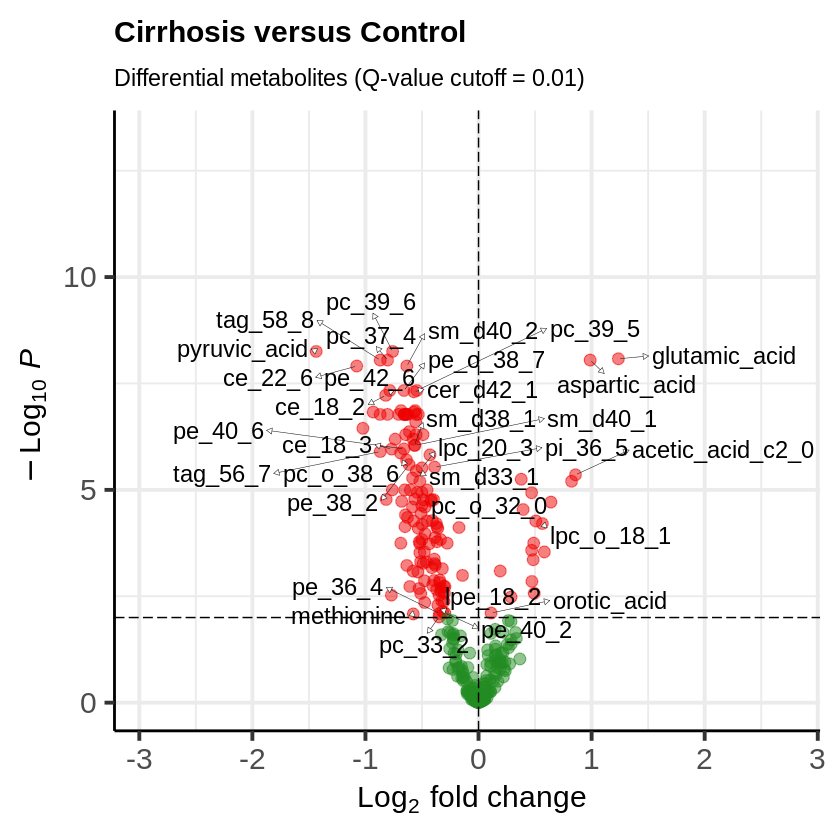

In [70]:
vp_cirr_neg <- EnhancedVolcano(cir_cneg,
                lab = cir_cneg$feature,
                x = "logFC",
                y = "adj.P.Val",
                title = expression(bold("Cirrhosis versus Control",sep="")),
                subtitle = "Differential metabolites (Q-value cutoff = 0.01)",
                caption = NULL,
                pCutoff = 0.01,
                FCcutoff = 0,
                pointSize = 3.0,
                labSize = 5.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 35
               ) + theme(legend.position = "none")

vp_cirr_neg

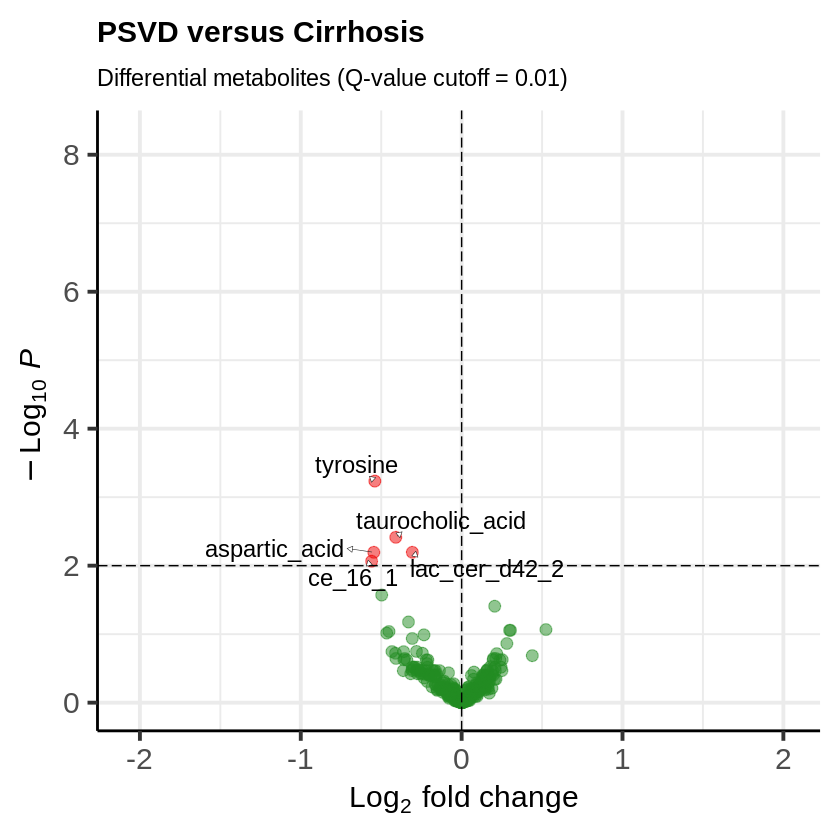

In [72]:
vp_psvd_cir <- EnhancedVolcano(psvd_cir,
                lab = psvd_cir$feature,
                x = "logFC",
                y = "adj.P.Val",
                title = expression(bold("PSVD versus Cirrhosis",sep="")),
                subtitle = "Differential metabolites (Q-value cutoff = 0.01)",
                caption = NULL,
                pCutoff = 0.01,
                FCcutoff = 0,
                pointSize = 3.0,
                labSize = 5.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 55
               ) + theme(legend.position = "none")

vp_psvd_cir

Warning message:
“ggrepel: 135 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


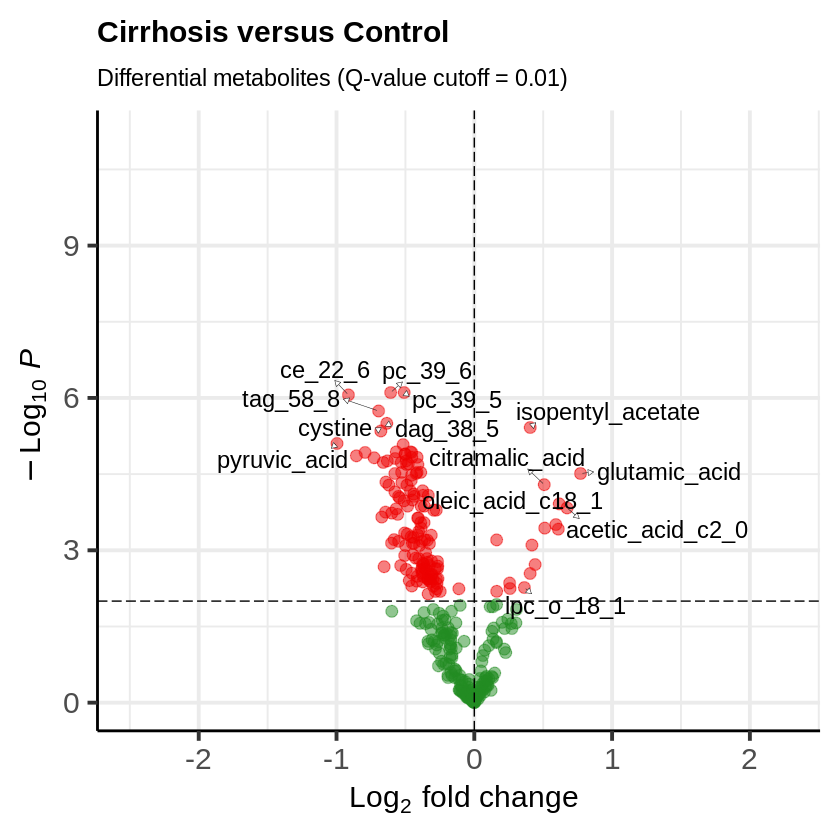

In [75]:
vp_psvd_cneg <- EnhancedVolcano(psvd_cneg,
                lab = psvd_cneg$feature,
                x = "logFC",
                y = "adj.P.Val",
                title = expression(bold("Cirrhosis versus Control",sep="")),
                subtitle = "Differential metabolites (Q-value cutoff = 0.01)",
                caption = NULL,
                pCutoff = 0.01,
                FCcutoff = 0,
                pointSize = 3.0,
                labSize = 5.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 35
               ) + theme(legend.position = "none")

vp_psvd_cneg

## Outputs

In [11]:
cir_cneg
psvd_cneg

feature,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pc_39_6,-0.7599441,0.022982456,-8.226086,2.609553e-11,5.589951e-09,15.570429
pyruvic_acid,-1.4357324,0.048035088,-8.135171,3.701955e-11,5.589951e-09,15.228136
glutamic_acid,1.2367824,-0.028491228,7.926610,8.267839e-11,8.322958e-09,14.441634
pc_37_4,-0.8040265,0.025385965,-7.763918,1.549035e-10,8.928774e-09,13.827141
tag_58_8,-0.8694794,0.016982456,-7.751645,1.624217e-10,8.928774e-09,13.780758
aspartic_acid,0.9872824,-0.034052632,7.728815,1.773929e-10,8.928774e-09,13.694468
ce_22_6,-1.0770529,0.038929825,-7.597478,2.946525e-10,1.231946e-08,13.197905
sm_d40_2,-0.6340853,0.011508772,-7.571047,3.263433e-10,1.231946e-08,13.097947
pc_39_5,-0.5452382,0.020403509,-7.197383,1.383826e-09,4.625451e-08,11.684745


feature,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pc_39_5,-0.50910,0.020403509,-7.010562,2.848449e-09,7.828716e-07,11.034807
pc_39_6,-0.60710,0.022982456,-6.855407,5.184580e-09,7.828716e-07,10.454367
ce_22_6,-0.91355,0.038929825,-6.722427,8.656421e-09,8.714130e-07,9.957691
tag_58_8,-0.69440,0.016982456,-6.458114,2.391390e-08,1.805500e-06,8.973565
dag_38_5,-0.63530,0.014789474,-6.253403,5.235913e-08,3.162491e-06,8.215119
isopentyl_acetate,0.40570,-0.017421053,6.156067,7.590302e-08,3.820452e-06,7.855933
cystine,-0.67825,0.016385965,-6.074175,1.036618e-07,4.472267e-06,7.554557
pyruvic_acid,-0.99640,0.048035088,-5.889634,2.086625e-07,7.877008e-06,6.878504
pe_o_38_7,-0.51650,0.019614035,-5.844295,2.476339e-07,8.309493e-06,6.713125


In [12]:
cir_up <- subset(cir_cneg, adj.P.Val < 0.01)
cir_down <- subset(cir_up, logFC < 0)
cir_up <- subset(cir_up, logFC > 0)


psvd_up <- subset(psvd_cneg, adj.P.Val < 0.01)
psvd_down <- subset(psvd_up, logFC < 0)
psvd_up <- subset(psvd_up, logFC > 0)

In [19]:
cir_up

feature,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
glutamic_acid,1.2367824,-0.028491228,7.926610,8.267839e-11,8.322958e-09,14.4416343
aspartic_acid,0.9872824,-0.034052632,7.728815,1.773929e-10,8.928774e-09,13.6944685
acetic_acid_c2_0,0.8575265,-0.056350877,5.565742,7.045223e-07,4.432619e-06,5.6068507
isopentyl_acetate,0.3774676,-0.017421053,5.490560,9.322647e-07,5.630878e-06,5.3349824
isovaleric_acid_3_me_4_0,0.8228853,-0.050403509,5.450326,1.082587e-06,6.287335e-06,5.1899484
taurocholic_acid,0.4695882,-0.033859649,5.248222,2.283488e-06,1.168836e-05,4.4666095
propionic_acid_c3_0,0.6400324,-0.061877193,5.074597,4.306820e-06,1.941283e-05,3.8527656
pc_o_32_0,0.3943941,-0.004245614,4.947770,6.816535e-06,2.899428e-05,3.4092633
citramalic_acid,0.5064324,-0.026403509,4.748034,1.393365e-05,5.394822e-05,2.7200058


In [20]:
write.csv(cir_up, "outputs/02_cir_up")
write.csv(cir_down, "outputs/02_cir_down")

write.csv(psvd_up, "outputs/02_psvd_up")
write.csv(psvd_down, "outputs/02_psvd_down")